In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
titanic=pd.read_csv('titanic-passengers.csv',sep=';')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
titanic.head()
#Some features contain missing values 'Nan'
#Some categorical features need to be converted to numerical ones so they can be processed by the algorithm.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [5]:
titanic.info() 
#The dataframe contains data about titanic disaster. It is composed of 11 columns of inputs and one column represtenting the target (Survived).
#Name, Sex, ticket, Cabin and Embarked are categorical features.
#Passenger Id,Pclass,Age,Sibsp, Parch and Fare are numerical features.
#pclass: Ticket class , sibsp: number of siblings / spouses aboard the Titanic, parch: number of parents / children aboard the Titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
titanic.describe() 
#Describe method works only on numerical data
#The tickets were from class 1 to class 3. 50% of passengers were on third class.
#Passengers were aged between 0.4 and 80 years. The mean age was 30 years. 50 % of passengers were aged 28 years. 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum().sum() 
#The data frame contains 866 missing values "NaN"

866

In [8]:
titanic.isnull().sum() 
#The missing values are in columns 'Age' , 'cabin' and 'embarked'
#The embarked feature has only 2 missing values
#The column oof age has only 177 missing values
#687 values are missing in Cabin column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.drop(['PassengerId'], axis=1,inplace=True)
titanic
#Passenger Id feature is not relevant, so it has been dropped 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [11]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic
#Missing age values were replaced by mean.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,NaN,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,NaN,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,NaN,S


In [12]:
titanic['Age'].isnull().sum().sum()  #number of Nan became 0

0

In [13]:
print(titanic['Embarked'].value_counts().idxmax())

S


In [14]:
titanic['Embarked'].fillna('S',inplace=True)
titanic
#Missing values in embarked feature were replaced with the most frequent value

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,NaN,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,NaN,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,NaN,S


In [15]:
print(titanic['Cabin'].value_counts())

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
D9             1
B39            1
E50            1
B80            1
C95            1
Name: Cabin, Length: 147, dtype: int64


In [16]:
titanic['Cabin'].fillna('G6',inplace=True)
titanic
#Missing values in Cabin feature were replaced with one of the most frequent values

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [17]:
Surv = {"Survived":{"No":0,"Yes":1}}
titanic.replace(Surv,inplace=True)
titanic
#Passengers who survived are presented by'1'and those who didn't are presented by '0'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [18]:
titanic.describe()
#Since mean=0.38: 38% of the passengers survived.

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:title={'center':'Survival rate'}, xlabel='Survived', ylabel='Number'>

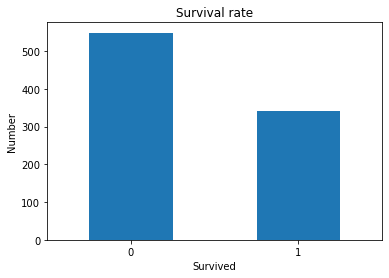

In [19]:
plt.title("Survival rate")

plt.xlabel("Survived")
plt.ylabel("Number")

vc=titanic['Survived'].value_counts()
vc.plot.bar(rot=0)

#339 passengers (38%) among 891 have survived.

<AxesSubplot:title={'center':'Sex of the passengers'}, xlabel='Gender', ylabel='Number'>

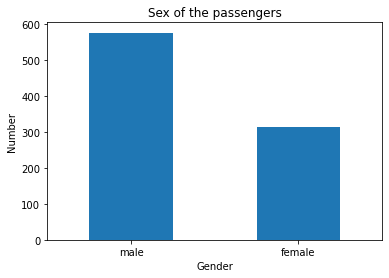

In [20]:
plt.title("Sex of the passengers")

plt.xlabel("Gender")
plt.ylabel("Number")

vc=titanic['Sex'].value_counts()
vc.plot.bar(rot=0)

#312 of the passengers were females.
#The number of females is less important than males number.

<AxesSubplot:title={'center':'Age of the passengers'}, xlabel='Age', ylabel='Frequency'>

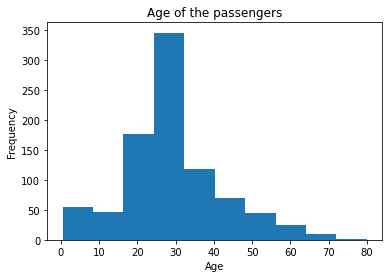

In [21]:
plt.title("Age of the passengers")

plt.xlabel("Age")


titanic['Age'].plot.hist()

#The passengers were aged between 0.4 and 80 years, most of the passengers were aged between 25 and 30 years old

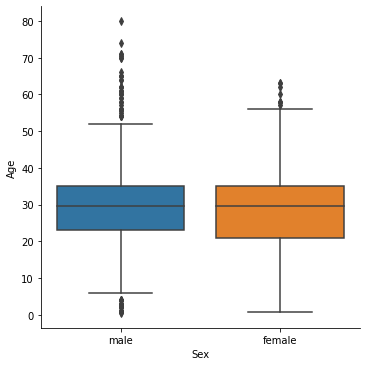

In [24]:
AS = sns.catplot(y="Age", x="Sex", data = titanic, kind="box")
#Age distribution seems to be almost the same in males and females passengers.

In [29]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


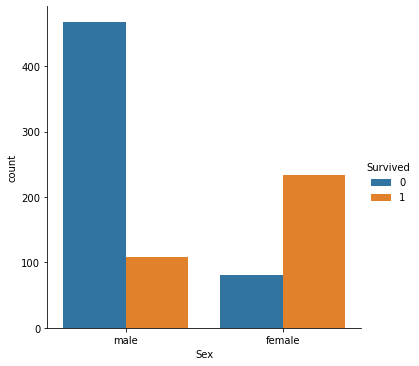

In [25]:
#We need to know the effect of sex and age on the survival rate. 
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = titanic)
#Female passengers had a higher survival rate than males (74% of survivors=251) while the survival rate of male passengers was 61. 

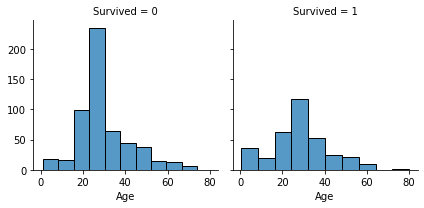

In [26]:
g=sns.FacetGrid(titanic,col='Survived')
g.map(sns.histplot,'Age',bins=10)

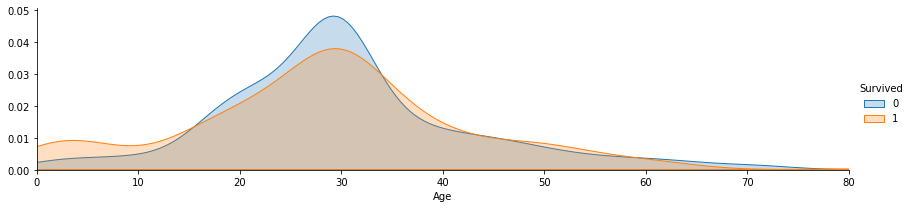

In [28]:
fig = sns.FacetGrid(titanic, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, titanic['Age'].max()))
fig.add_legend()

# Children had a relatively high survival rate.
# A wide number of passengers aged between 25 and 35 years olds did not survive.

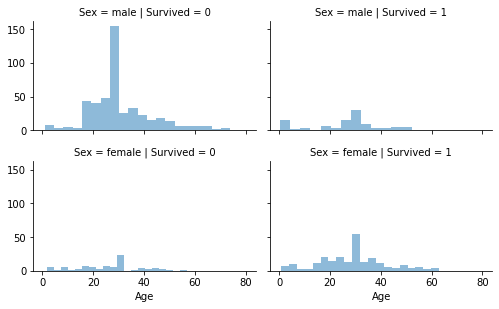

In [37]:
#Let's explore the realtionship between sex, age and survival rate.
grid = sns.FacetGrid(titanic, col='Survived', row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

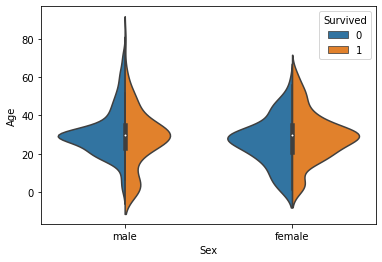

In [36]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)

#Female passengers had a higher survival rate than males.
#Children had a relatively high survival rate.
#Males aged between 25 and 30 had the higher survival rate among all males.Survival rate was very low between 5 and 18 years.
#Females aged between 25 and 30 had the higher survival rate among all females.

In [30]:
#Let's see the effect of the ticket class on the survival rate.
print(titanic['Pclass'].value_counts())
#491 of the passengers were in the 3rd class, 216 were in 1st class and 184 were in the 2nd class.

3    491
1    216
2    184
Name: Pclass, dtype: int64


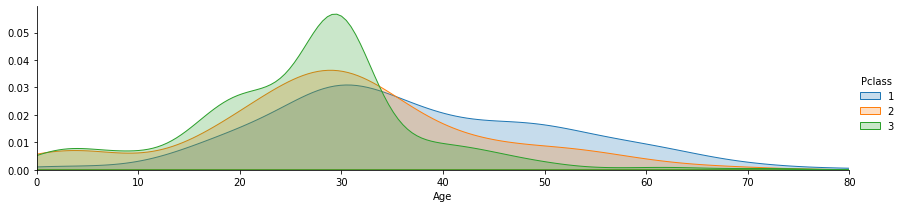

In [32]:
facet = sns.FacetGrid(titanic, hue="Pclass", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.show()
#Most of the young passengers <40 years old were in class 3. Class 1 seems to be mostly booked by older passengers.

In [31]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#62 % of 1st class passengers survived 
#47 % of the 2sd class passengers survived 
#24 % of the 3rd class passengers survived 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

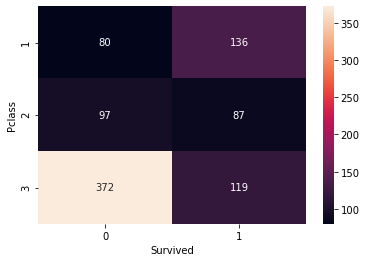

In [33]:
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt ="d")

#Although most of passengers were in the third class, only 24% of them survived. While,the first class passenegrs had the most important survival rate.

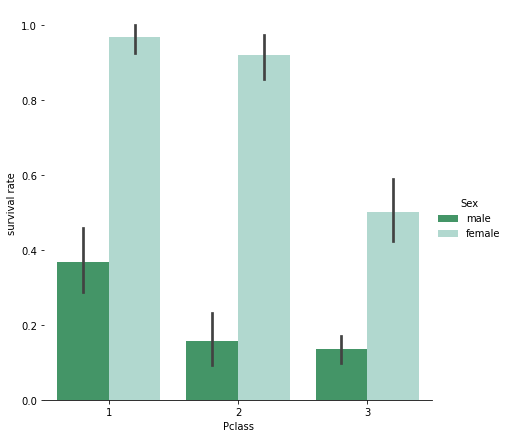

In [35]:
#Now, let's see the relationship between class, sex and survival rate.
Survived_Pcalss = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic,height=6, kind="bar", palette="BuGn_r")
Survived_Pcalss.despine(left=True)
Survived_Pcalss = Survived_Pcalss.set_ylabels("survival rate")
#Females survived more than males in every classes.

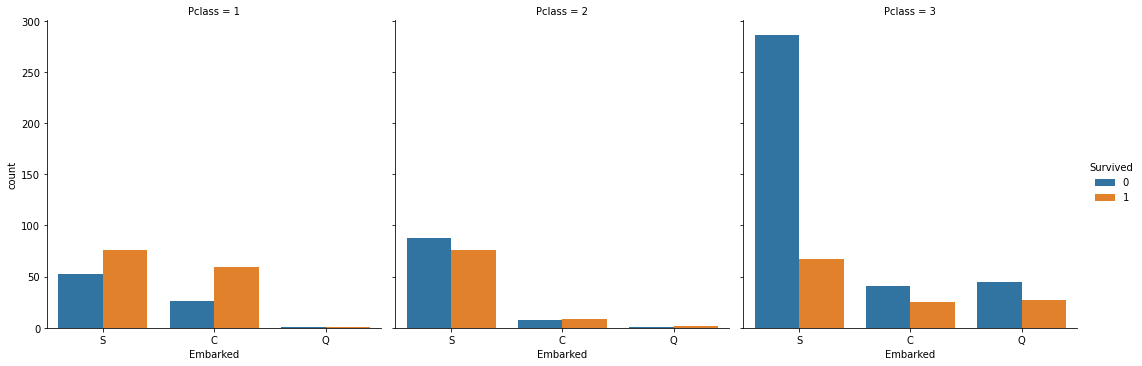

In [38]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = titanic)


# Majority of the 3rd class passengers boarded from S.
# Survival rate of passengers embarked from S was relatively higher then those embarked from c and Q.

In [39]:
#Let's change sex and embarked values to numerical values so we build do a heatmap.
Gender = {"Sex":{"male":0,"female":1}}
titanic.replace(Gender,inplace=True)
Embarked = {"Emabrked":{"S":0,"C":1,"Q":2}}
titanic.replace(Gender,inplace=True)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,G6,S
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,G6,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,G6,S
4,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,G6,C
887,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,G6,C
888,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,G6,S
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,G6,S


In [40]:
#Calculating correlation between all the numerical features
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
corr = titanic[cols].corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000


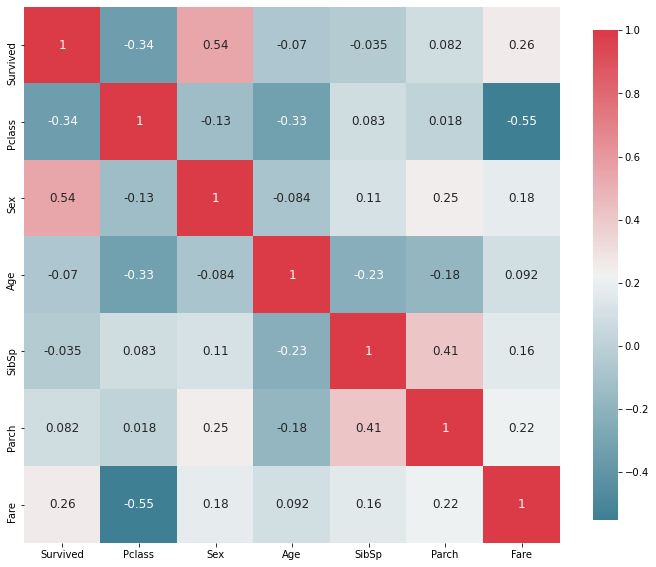

In [41]:
# This function provides a heatmap for to a better inisght of the correlation between the different parameters.
# It allows to find relationship among the different features and between the features and the target.
# It allows to know wich parameteres affect the most the target.Thus,it leads to choose the most important features and drop the less important ones.

def plot_correlation_map( titanic): #the df.corr() method ignores non-numerical columns
    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }) 

plot_correlation_map(titanic)

plt.show()

# There is no correltion noted between survival and age (r=0.54). however, a relatively strong positive correlation is noted between sex and survival rate (r=0.54). This is consistent with the previous observations, female sex had more chance to survive.
# No correlation is noted between Parch, SibSp and Survival rate (respectively r=0.082 and r=-0.035).
# A moderate negative correlation was noted between Pclass and survival rate (r=-0.34) since the passengers of the 1st class had the most important survival rate. This is in agreement with the previous obesrvations.
# A low positive correlation was noted between fare and survival (r=0.26).

# Relatively stong negative correlation (r=-0.55) is reported between Pclass and fare since the 1st class costs the most.
# Moderate negative correlation (r=-0.33) is reported between Age and Pclass. Eldiest persnons relatively preferred 1st class. This is in agreement with the earlier observations.
#Conclusion : It's seems that the sex of passenger is the most relevant feature realted to survival rate. 

In [44]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
titles = sorted(set([x for x in titanic.Name.map(lambda x: get_title(x))]))
print('Different titles found in titanic dataset:')
print(len(titles), ':', titles)
print()

Different titles found in titanic dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']



In [45]:
titanic['Title'] = titanic['Name'].map(lambda x: get_title(x))

titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,G6,S,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S,Mr
2,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,G6,S,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,G6,C,Mr
888,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,G6,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,G6,S,Mr


In [46]:
titanic.Title.value_counts()
#Most of the passengers had the title of Mr. 

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Jonkheer          1
Mme               1
Capt              1
Ms                1
Sir               1
Lady              1
Don               1
Name: Title, dtype: int64

<AxesSubplot:>

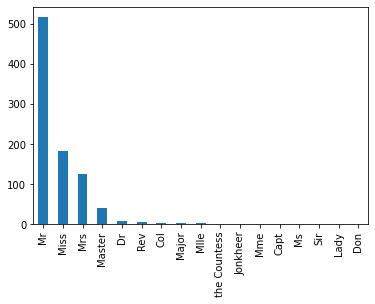

In [47]:
titanic.Title.value_counts().plot(kind='bar')

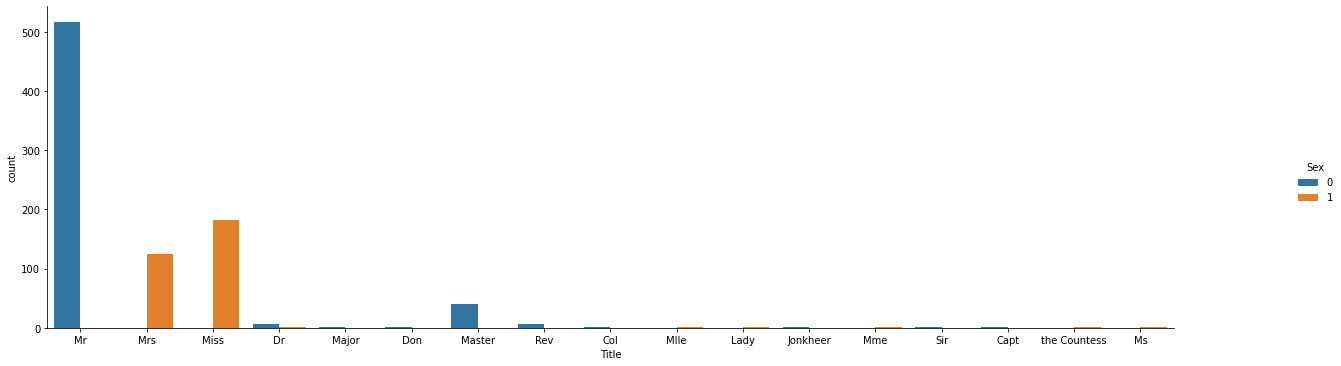

In [53]:
sns.catplot(x ="Title", hue ="Sex",kind ="count", data = titanic).fig.set_size_inches(20,5)
#Males titles : Mr, Major, Dr, Master, jonkheer, Sir, Capt
#Females titles: Mrs, Miss, Dr, Mlle, Lady, Mme, The Countess, Ms

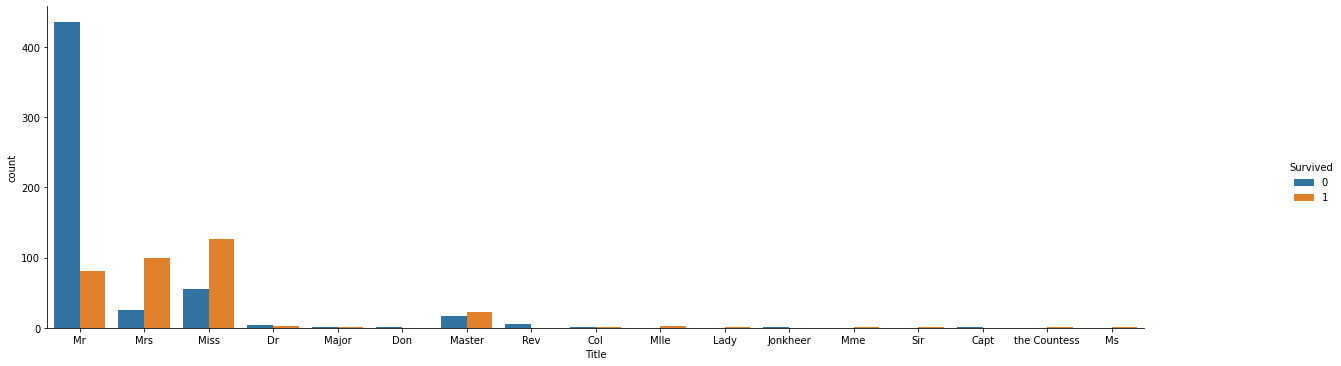

In [49]:
sns.catplot(x ="Title", hue ="Survived",kind ="count", data = titanic).fig.set_size_inches(20,5)
#Passengers with titles Mrs and Miss survived the most. This is correlated with the high number of females passengers who survived in comparison with males. 

<AxesSubplot:xlabel='Title', ylabel='Age'>

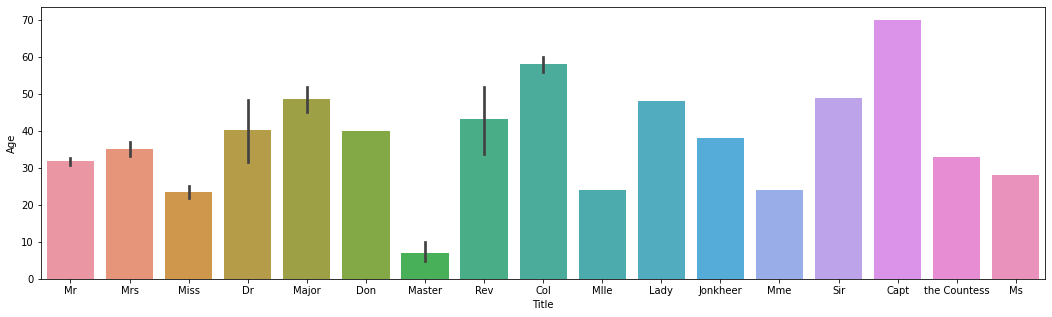

In [54]:
plt.figure(figsize=(18,5))
sns.barplot(x=titanic['Title'], y = titanic['Age'])

In [55]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt','Col','Major', 'Dr', 'Rev']:
        return 'Officer'
    elif title in [ "Jonkheer",'Don','Sir','the Countess', 'Dona']:
        return 'Royalty'
    elif title in ['Mme', 'Mlle','Miss']:
        return 'Miss'
    elif title in ['Ms','Mr','Mrs']:
        return 'Mrs'
    elif title=='Master':
            return 'Master'
    else:
        return title
titanic['Title'] = titanic.apply(replace_titles, axis=1)

titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,G6,S,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S,Mrs
2,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,G6,S,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,G6,C,Mrs
888,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,G6,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,G6,S,Mrs


In [56]:
titanic.drop(labels = ["Name"], axis = 1, inplace = True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,2,0,28.000000,0,0,248740,13.0000,G6,S,Mrs
1,0,3,0,25.000000,0,0,348123,7.6500,F G73,S,Mrs
2,0,3,0,20.000000,0,0,350050,7.8542,G6,S,Mrs
3,0,3,1,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,0,1,0,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,0,3,0,22.000000,0,0,2669,7.2292,G6,C,Mrs
888,0,3,1,30.000000,0,0,315084,8.6625,G6,S,Miss
889,0,3,0,29.699118,0,0,349215,7.8958,G6,S,Mrs


In [57]:
titanic.Title.value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      4
Lady         1
Name: Title, dtype: int64

<AxesSubplot:>

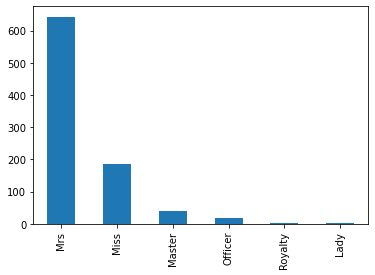

In [63]:
titanic.Title.value_counts().plot(kind='bar')
#Most of the passengers had the title of Mrs.

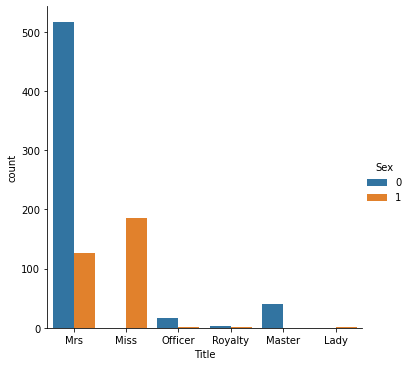

In [62]:
sns.catplot(x ="Title", hue ="Sex",kind ="count", data = titanic)
#Mrs englobes the titles Mr, Ms, Mrs so it is composed of both males and females.

<AxesSubplot:xlabel='Title', ylabel='Age'>

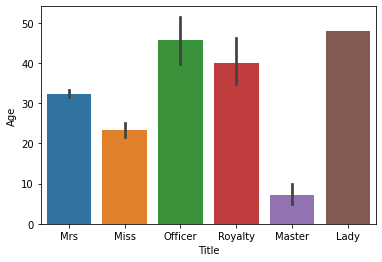

In [67]:
plt.figure
sns.barplot(x=titanic['Title'], y = titanic['Age'])
#Passengers who had the titles Officer and Lady were the most aged ones.
#Master was attributed to the youngest passengers.

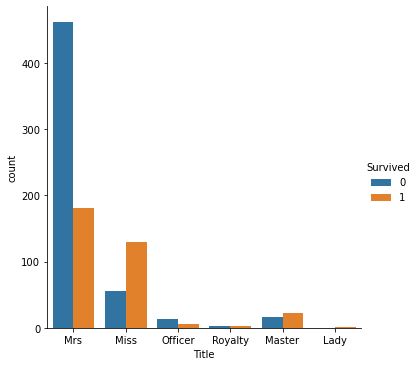

In [66]:
sns.catplot(x ="Title", hue ="Survived",kind ="count", data = titanic)
#Passengers with titles Mrs and Miss were the most frequent and had the largest number of survivors. 
#the youngest passengers 'Master' had a large number of survivors. 
#Grouping titles in small groupes made the analyze of figures easier. 

In [68]:
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [69]:
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1
titanic


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Alone
0,0,2,0,28.000000,0,0,248740,13.0000,G6,S,Mrs,0,1
1,0,3,0,25.000000,0,0,348123,7.6500,F G73,S,Mrs,0,1
2,0,3,0,20.000000,0,0,350050,7.8542,G6,S,Mrs,0,1
3,0,3,1,29.000000,0,4,349909,21.0750,G6,S,Mrs,4,0
4,0,1,0,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mrs,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.000000,1,0,237736,30.0708,G6,C,Mrs,1,0
887,0,3,0,22.000000,0,0,2669,7.2292,G6,C,Mrs,0,1
888,0,3,1,30.000000,0,0,315084,8.6625,G6,S,Miss,0,1
889,0,3,0,29.699118,0,0,349215,7.8958,G6,S,Mrs,0,1


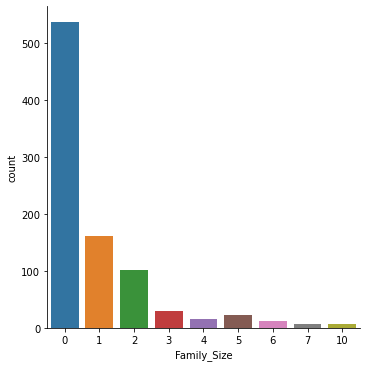

In [70]:
sns.catplot(x ="Family_Size",kind ="count", data = titanic)

# Family size is ranged betweeen 0 and 10

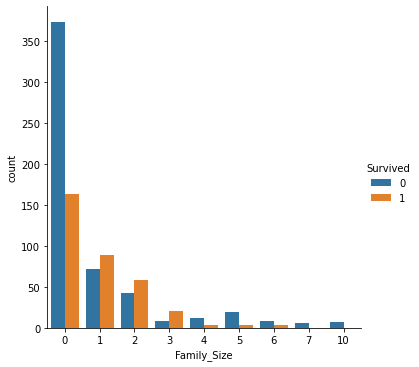

In [71]:
sns.catplot(x ="Family_Size", hue ="Survived",kind ="count", data = titanic)

#Passengers who traveled with family had a higher survival rate than those who traveled alone.

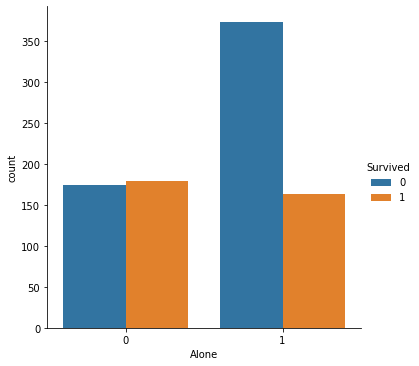

In [72]:
sns.catplot(x ="Alone", hue ="Survived",kind ="count", data = titanic)
#Passengers who were alone had less chances to survive.
#The feature 'family size' is relevant because it helped us to make new conclusions. Passengers who traveled with family had the chance to be rescued by their own family members.